In [1]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
basePath = '../sims.TNG/TNG300-1/output/'
SnapNum = 99

In [3]:
threshold_mass = 10**14.5 # Minimum masses of the halos to select

In [4]:
required_snapshots = [99, 33, 25, 13, 8] # Corresponding to their respective redshifts
tot_snaps = len(required_snapshots)
tot_snaps

5

In [5]:
redshifts = []
for i in range(tot_snaps):
    header = il.groupcat.loadHeader(basePath, required_snapshots[i])
    redshifts.append(round(header['Redshift']))
redshifts

[0, 2, 3, 6, 8]

In [6]:
times = []
for i in range(tot_snaps):
    header = il.groupcat.loadHeader(basePath, required_snapshots[i])
    times.append(int(header['Time']))

In [7]:
# Defining a function for unit conversion
def UnitConversion(array, SnapNum, unit):
    header = il.groupcat.loadHeader(basePath, SnapNum)
    h = header['HubbleParam']
    a = header['Time']
    if unit == 'mass':
        array = array * 1e10 / h # In Msun unit
    if unit == 'length':
        array = array * a / (1e3 * h) # In Mpc unit
    return array

In [48]:
fields=['Group_M_Crit200', 'GroupFirstSub']

In [49]:
halos = il.groupcat.loadHalos(basePath, SnapNum, fields=fields)

In [50]:
# halos['Group_M_Crit200']

In [55]:
halos_mass = UnitConversion(halos['Group_M_Crit200'], SnapNum, 'mass')
np.count_nonzero(halos_mass)/len(halos_mass)

0.6502660404364216

In [12]:
# Selecting the halos above a certain threshold mass
halo_IDs = np.nonzero(halos_mass >= threshold_mass)
# len(halo_IDs[0])

In [13]:
masses_halo = halos_mass[halo_IDs[0]]
masses_halo

array([1.5357900e+15, 1.3073401e+15, 1.0333144e+15, 8.9967022e+14,
       8.4181970e+14, 7.3352740e+14, 4.5928518e+14, 5.8122068e+14,
       3.9825161e+14, 6.4121164e+14, 6.3585347e+14, 5.4733694e+14,
       6.5518156e+14, 5.5387734e+14, 4.3728320e+14, 4.9731597e+14,
       3.7920424e+14, 4.1666149e+14, 4.0715522e+14, 4.6737187e+14,
       4.3128679e+14, 3.8214609e+14, 3.6035957e+14, 3.9222551e+14,
       3.6736489e+14, 4.5610449e+14, 4.7101947e+14, 3.8932734e+14,
       3.9017738e+14, 3.9039374e+14, 3.6959079e+14, 3.6782583e+14,
       3.8122808e+14, 3.7420798e+14, 3.3413346e+14, 3.5726082e+14,
       3.4338072e+14, 3.3250620e+14, 3.2415152e+14, 3.2403874e+14,
       3.3821059e+14], dtype=float32)

In [14]:
# Extracting the central subhalos of the selected halos
sub_halos_ID = halos['GroupFirstSub'][halo_IDs]
n = len(sub_halos_ID)
# sub_halos_ID

In [57]:
fields = ['Group_M_Crit200']

In [60]:
range(1, 3, 2)

range(1, 3, 2)

In [61]:
halo_avg = []

for i in range(tot_snaps):
    halos = il.groupcat.loadHalos(basePath, required_snapshots[i], fields=fields)
    halos_masses = UnitConversion(halos, required_snapshots[i], 'mass')
    halo_avg.append(np.average(np.nonzero(halos_masses)[0]))

halo_avg = np.array(halo_avg)

In [59]:
halo_avg

array([2.1746006e+10, 1.0866356e+10, 7.1205371e+09, 2.9276672e+09,
       2.0785519e+09], dtype=float32)

In [46]:
# halos = il.groupcat.loadHalos(basePath, required_snapshots[0], fields=fields)
# halos_masses = UnitConversion(halos, required_snapshots[0], 'mass')
np.sort(halos_masses)[::-1][:n] == np.sort(masses_halo)[::-1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [18]:
fields = ['Group_M_Crit200','SnapNum', 'SubhaloGrNr']

In [19]:
trees = [{} for _ in range(n)]

In [20]:
# Loading the merger trees of different subhalos using the Sublink algorithm
for i in range(n):
    trees[i] = il.sublink.loadTree(basePath, 99, sub_halos_ID[i], fields=fields, onlyMPB=True)

In [21]:
# # Plotting the critical masses as a function of snapshots
# fig, ax = plt.subplots(figsize=(10,8))
# for i in range(n):
#     tree_mass = []
#     for j in range(len(trees[i]['Group_M_Crit200'])):
#         tree_mass.append(UnitConversion(trees[i]['Group_M_Crit200'][j], trees[i]['SnapNum'][j], 'mass'))
#     ax = plt.plot(trees[i]['SnapNum'], tree_mass)
# plt.yscale('log')
# plt.xlabel('Snapshot Number')
# plt.ylabel('M$_{200c}$ [log(M$_\odot$)]')
# plt.title('Evolution of M$_{200c}$ over various snapshots')
# plt.tight_layout()
# plt.show()

In [36]:
# Initialising the required arrays
mass = [[] for _ in range(tot_snaps)]
mass_rank = [[] for _ in range(tot_snaps)]
grp_n = [[] for _ in range(tot_snaps)]

In [37]:
for i in range(tot_snaps):
    # Extracting the masses for various snapshots
    for tree in trees:
        mass[i].extend(UnitConversion(tree['Group_M_Crit200'][tree['SnapNum'] == required_snapshots[i]], required_snapshots[i], 'mass'))
        grp_n[i].extend(tree['SubhaloGrNr'][tree['SnapNum'] == required_snapshots[i]])
    mass[i] = np.array(mass[i])
    grp_n[i] = np.array(grp_n[i])

In [24]:
# mass_temp = mass[1]

In [25]:
# # Sorting their masses
# for i in range(tot_snaps):
#     mass_rank[i] = np.argsort(mass[i])[::-1]

In [26]:
# mass[1]

In [27]:
# grp_n[1]

In [28]:
# # Sorting their masses
# for i in range(tot_snaps):
#     sorting = np.argsort(mass[i])
#     mass[i] = mass[i][sorting][::-1]
#     grp_n[i] = grp_n[i][sorting][::-1]

In [29]:
# grp_n

In [30]:
mass

[array([1.5357900e+15, 1.3073401e+15, 1.0333144e+15, 8.9967022e+14,
        8.4181970e+14, 7.3352740e+14, 4.5928518e+14, 5.8122068e+14,
        3.9825161e+14, 6.4121164e+14, 6.3585347e+14, 5.4733694e+14,
        6.5518156e+14, 5.5387734e+14, 4.3728320e+14, 4.9731597e+14,
        3.7920424e+14, 4.1666149e+14, 4.0715522e+14, 4.6737187e+14,
        4.3128679e+14, 3.8214609e+14, 3.6035957e+14, 3.9222551e+14,
        3.6736489e+14, 4.5610449e+14, 4.7101947e+14, 3.8932734e+14,
        3.9017738e+14, 3.9039374e+14, 3.6959079e+14, 3.6782583e+14,
        3.8122808e+14, 3.7420798e+14, 3.3413346e+14, 3.5726082e+14,
        3.4338072e+14, 3.3250620e+14, 3.2415152e+14, 3.2403874e+14,
        3.3821059e+14], dtype=float32),
 array([1.3221673e+14, 2.6049832e+13, 9.4274188e+13, 1.9019392e+13,
        1.2976901e+14, 1.1618809e+14, 3.7337317e+13, 1.9179464e+13,
        4.3392801e+13, 7.9388519e+13, 3.2344675e+13, 6.8557498e+12,
        1.5453686e+13, 4.5158607e+13, 9.4377133e+13, 3.3784903e+13,
        

In [31]:
for i in range(tot_snaps):
    mass[i] = ((mass[i]/halo_avg[i]) - 1)

In [34]:
halo_avg

array([5.1964903e+14, 5.8749306e+13, 1.9524433e+13, 1.5484849e+12,
       4.2236356e+11], dtype=float32)

In [40]:
format(np.average(mass[0]), '.7e')

'5.1964913e+14'

/tmp/ipykernel_637/2655351376.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


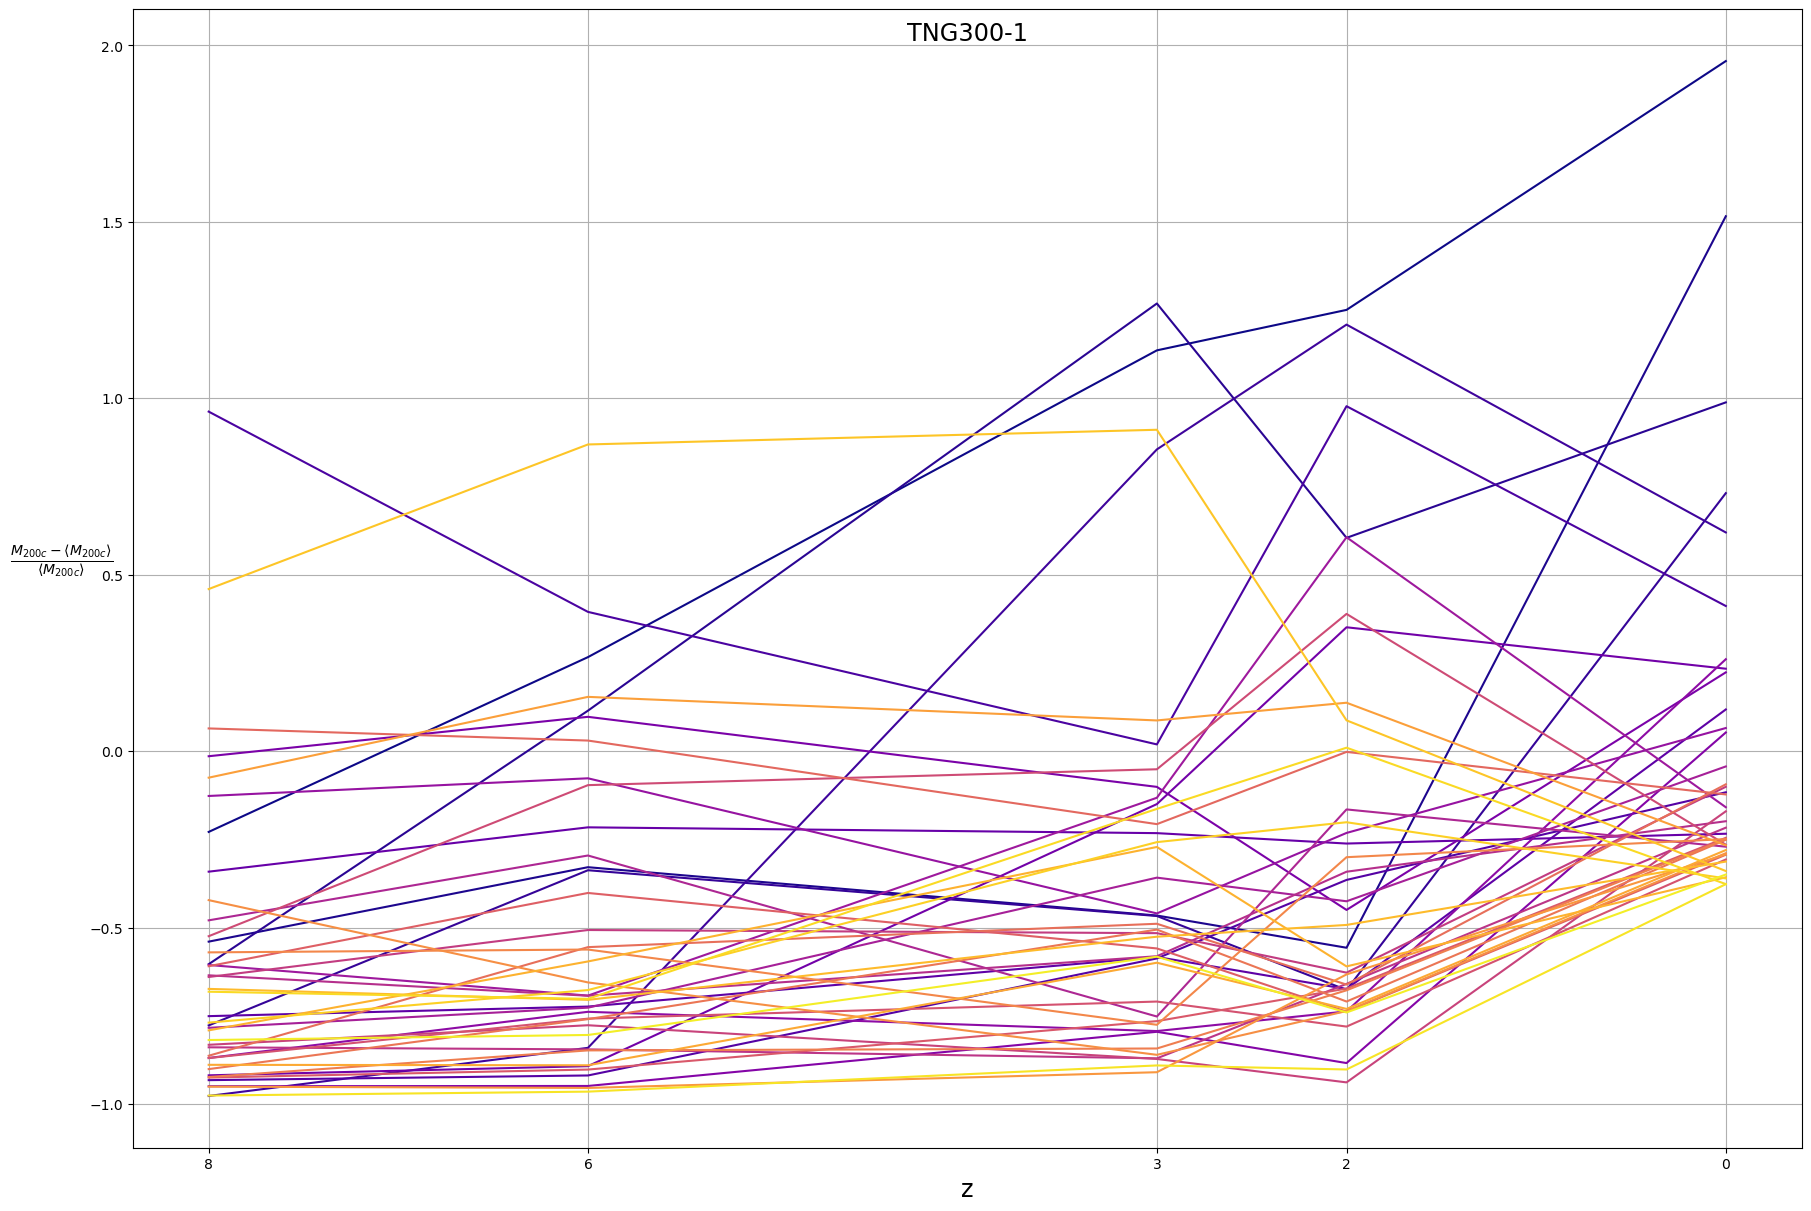

In [33]:
fig, ax = plt.subplots(figsize=(18, 12), layout='constrained')

cmap = cm.get_cmap('plasma')
norm = plt.Normalize(0, n)

for i in range(n):
    ax.plot(redshifts, [ymass[i] for ymass in mass], c=cmap(norm(i)))
    
    
ax.set_xticks(redshifts)
ax.set_xlabel('z', fontsize='xx-large')
ax.invert_xaxis()
ax.set_ylabel(r'$\frac{M_{200c} - \langle M_{200c} \rangle}{\langle M_{200c} \rangle}$', rotation='horizontal', labelpad=20, fontsize='x-large')
ax.legend(title='TNG300-1', title_fontsize='xx-large', loc='upper center', frameon=False)
plt.grid(axis='both')
plt.savefig('avg_n_mass_1_new6.png')
plt.show()

/tmp/ipykernel_743/2451428439.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


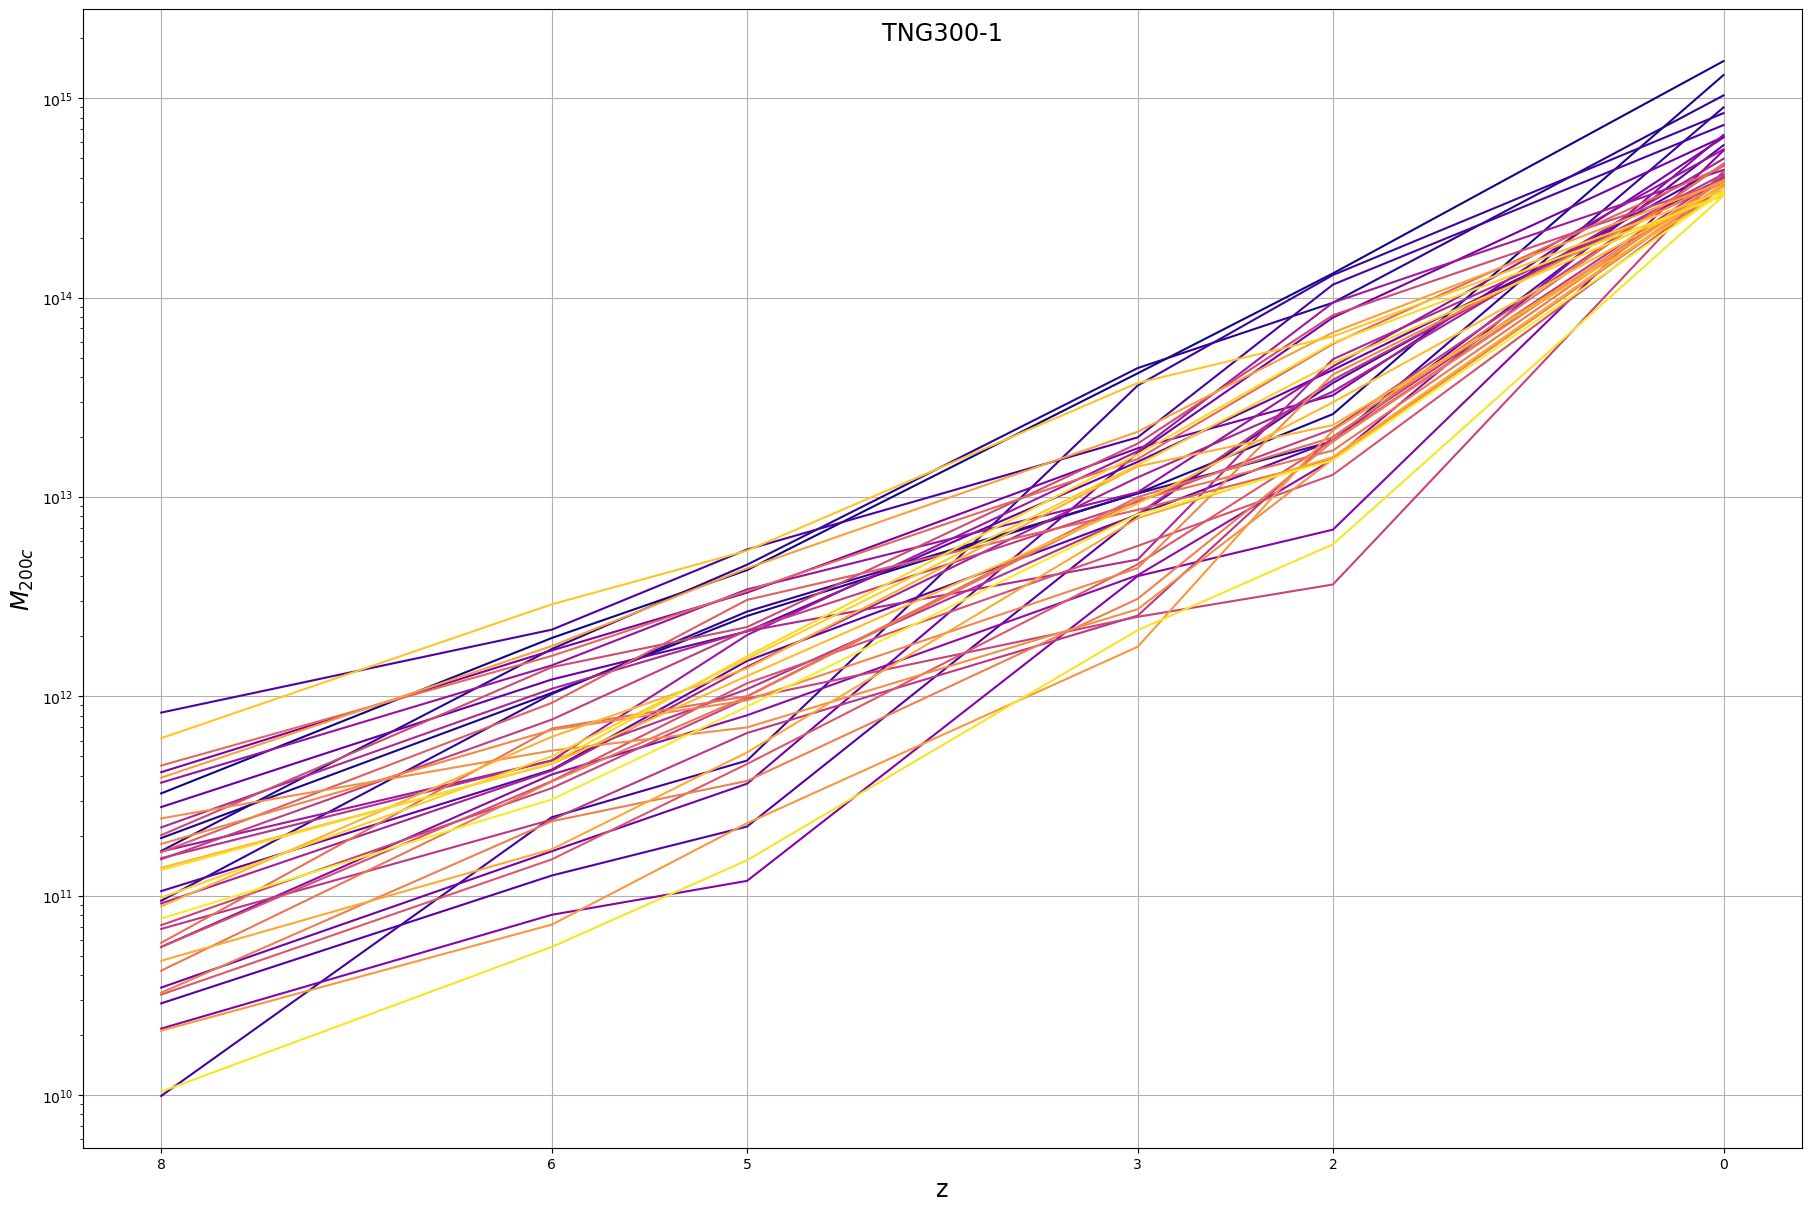

In [36]:
fig, ax = plt.subplots(figsize=(18, 12), layout='constrained')

cmap = cm.get_cmap('plasma')
norm = plt.Normalize(0, n)

for i in range(n):
    ax.plot(redshifts, [ymass[i] for ymass in mass], c=cmap(norm(i)))
    
    
ax.set_xticks(redshifts)
ax.set_xlabel('z', fontsize='xx-large')
ax.set_yscale('log')
ax.invert_xaxis()
ax.set_ylabel('$M_{200c}$', fontsize='xx-large')
ax.legend(title='TNG300-1', title_fontsize='xx-large', loc='upper center', frameon=False)
plt.grid(axis='both')
# plt.savefig('mass_1.png')
plt.show()

In [76]:
# # Comparing the order of Group_M_Crit200 across different snapshots
# rank = [[] for _ in range(n)]
# print('z->', *redshifts, sep='\t', end='\n\n\n')
# for i in range(n):
#     temp = []
#     print(i+1,end='->\t')
#     for j in range(tot_snaps):
#         temp.append(halo_IDs[0][mass_rank[j][i]])
#         print(halo_IDs[0][mass_rank[j][i]], end='\t')
#     rank[i].extend(temp)
#     print('\n')

In [77]:
# rank_reshape = np.zeros((tot_snaps, n))
# for i in range(tot_snaps):
#     for j in range(n):
#         rank_reshape[i][j] = rank[j][i]
# # rank_reshape

In [78]:
# # Create labels
# labels_l = []
# for i in range(n):
#     labels_l.append(f'[{grp_n[-1][i]}] {i+1}')

In [79]:
# labels_r = []
# for i in range(n):
#     labels_r.append(f'{i+1} [{grp_n[0][i]}]')

In [80]:
# labels[0]

In [81]:
# rank_diff = []
# rank_diff2 = []
# rank_diff3 = []
# rank_diff4 = []
# fig, ax = plt.subplots(figsize=(16, 10), layout='constrained')

# cmap = cm.get_cmap('plasma')

# norm = plt.Normalize(0, n)



# for i in range(n):
#     past_rank = []
#     curr_rank = rank_reshape[0][i]
#     past_rank.append(i)
#     for j in range(1, tot_snaps):
#         for k in range(n):
#             if rank_reshape[j][k] == curr_rank:
#                 past_rank.append(k)
#                 break
#     rank_diff.append(past_rank[int(np.nonzero(np.array(redshifts) == redshifts[-1])[0])] - past_rank[0])
#     rank_diff2.append(past_rank[int(np.nonzero(np.array(redshifts) == redshifts[-2])[0])] - past_rank[0])
#     rank_diff3.append((np.array(past_rank[int(np.nonzero(np.array(redshifts) == redshifts[-1])[0])])+1) / (np.array(past_rank[0])+1))
#     rank_diff4.append((np.array(past_rank[int(np.nonzero(np.array(redshifts) == redshifts[-2])[0])])+1) / (np.array(past_rank[0])+1))
#     ax.plot(redshifts, np.array(past_rank)+1, color=cmap(norm(i)))
# ax1 = ax.secondary_yaxis('right')
# ax.set_xticks(redshifts)
# ax.set_yticks(range(1, n+1), labels=labels_l)
# ax1.set_yticks(range(1, n+1), labels=labels_r)
# ax.set_xlabel('Redshift', fontsize='x-large')
# ax.set_ylabel('Rank', fontsize='x-large')
# # ax.set_title('Ranking Conservation')
# ax.invert_xaxis()
# ax.invert_yaxis()
# plt.grid(True)
# # plt.tight_layout()
# plt.legend(title='TNG300-1', title_fontsize='x-large', loc='upper center',  frameon=False)
# plt.savefig('rank_conservation_gnum1.png')
# plt.show()

In [82]:
# fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 10), layout='constrained')

# ax1.plot(np.arange(1, 42), rank_diff2, label=f'z={redshifts[-2]}')
# ax1.axhline(0, ls='--', c='k')

# ax1.set_xlabel('Rank at z = 0', fontsize='xx-large')
# ax1.set_ylabel('$\Delta$rank', fontsize='xx-large')
# ax1.set_xticks(np.arange(1, 42))
# ax1.set_yticks(np.arange(-35, 36, 5))
# ax1.legend(title='TNG300-1', title_fontsize='x-large', fontsize='large', loc='upper right')
# ax1.grid(axis='x')

# ax2.plot(np.arange(1, 42), rank_diff, c='r', label=f'z={redshifts[-1]}')
# ax2.axhline(0, ls='--', c='k')

# ax2.set_xlabel('Rank at z = 0', fontsize='xx-large')
# ax2.set_ylabel('$\Delta$rank', fontsize='xx-large')
# ax2.set_xticks(np.arange(1, 42))
# ax2.set_yticks(np.arange(-35, 36, 5))
# ax2.legend(title='TNG300-1', title_fontsize='x-large', fontsize='large', loc='upper right')
# ax2.grid(axis='x')

# # plt.savefig('rank_difference.png')
# plt.show()

In [83]:
# fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 10), layout='constrained')

# ax1.plot(np.arange(1, 42), rank_diff4, label=f'z={redshifts[-2]}')
# ax1.axhline(1, ls='--', c='k')

# ax1.set_xlabel('Rank at z = 0', fontsize='xx-large')
# ax1.set_ylabel('$\Delta_{rel}$ rank', fontsize='xx-large')
# ax1.set_xticks(np.arange(1, 42))
# ax1.set_yticks(np.arange(0, 10, 3))
# ax1.legend(title='TNG300-1', title_fontsize='x-large', fontsize='large', loc='upper right')
# ax1.grid(axis='x')

# ax2.plot(np.arange(1, 42), rank_diff3, c='r', label=f'z={redshifts[-1]}')
# ax2.axhline(1, ls='--', c='k')

# ax2.set_xlabel('Rank at z = 0', fontsize='xx-large')
# ax2.set_ylabel('$\Delta_{rel}$ rank', fontsize='xx-large')
# ax2.set_xticks(np.arange(1, 42))
# ax2.set_yticks(np.arange(0, 10, 3))
# ax2.legend(title='TNG300-1', title_fontsize='x-large', fontsize='large', loc='upper right')
# ax2.grid(axis='x')

# # plt.savefig('relative_rank_difference.png')
# plt.show()

In [84]:
# (np.array(rank_diff) * np.array(rank_diff2))

In [85]:
# np.count_nonzero((np.array(rank_diff3) * np.array(rank_diff4)) < 1)

In [86]:
# basePath = '../sims.TNG/TNG300-1/output/'
# SnapNum1 = 8

In [87]:
# fields1=['Group_M_Crit200']

In [88]:
# halos1 = il.groupcat.loadHalos(basePath, SnapNum1, fields=fields1)

In [89]:
# halos_mass1 = UnitConversion(halos1, SnapNum1, 'mass')

In [90]:
# sorted_halos1 = np.argsort(halos_mass1)[::-1]

In [91]:
# sorted_halos1[:50]

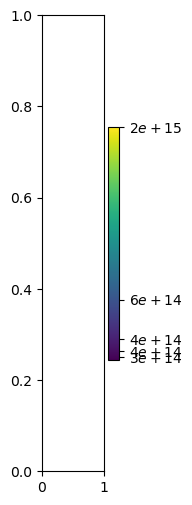

In [34]:
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.colors as mcolors
# import numpy as np

# # Example array X for tick labels
# X = masses_halo

# # Create a figure and axis for the color bar
# fig, ax = plt.subplots(figsize=(1, 12))
# fig.subplots_adjust(bottom=0.5)

# # Define the colormap and norm
# cmap = cm.viridis
# norm = mcolors.Normalize(vmin=X.min(), vmax=X.max())

# # Create a ScalarMappable and add the color bar
# sm = cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])  # Only needed for the color bar, no data
# cbar = fig.colorbar(sm, orientation='vertical', ax=ax)

# # Set the color bar ticks and labels
# cbar.set_ticks(X[::10])
# cbar.set_ticklabels([f'${t:.1g}$' for t in X[::10]])

# # Set the color bar label
# # cbar.set_label('Color Bar Label')

# plt.show()

# # # Create a ScalarMappable and add the color bar
# # sm = cm.ScalarMappable(cmap=cmap, norm=norm)
# # sm.set_array([])  # Only needed for the color bar, no data
# # cbar = fig.colorbar(sm, orientation='horizontal', ax=ax)

# # # Set the color bar ticks and labels
# # cbar.set_ticks(X)
# # cbar.set_ticklabels([f'$10^{{{int(np.log10(t))}}}$' for t in X])

# # # Set the color bar label
# # cbar.set_label('Color Bar Label (Powers of 10)')

# # plt.show()

/tmp/ipykernel_560/22876798.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma')


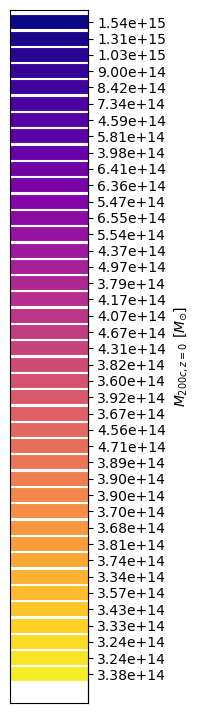

In [124]:
# fig, ax = plt.subplots(figsize=(1, 9))

# cmap = cm.get_cmap('plasma')
# norm = plt.Normalize(0, n)

# ax1 = ax.secondary_yaxis('right')

# for i in range(n):
#     ax.axhline(i+1, c=cmap(norm(i)), linewidth=10)

    
    
# # ax.set_yscale('log')
# formatted_labels = [f'{mass:.2e}' for mass in masses_halo]
# # ax.set_yticks(np.arange(1, n+1))
# ax1.set_yticks(np.arange(1,n+1), formatted_labels, fontsize='medium')
# ax1.set_ylim(bottom=0.25, top=n+1.75)
# ax.set_ylim(bottom=0.25, top=n+1.75)
# ax.set_xlim(left=0, right=0.25)
# ax1.set_ylabel('$M_{200c, z=0}\ [M_{\odot}]$')
# ax.invert_yaxis()
# ax.set_xticks([])
# ax.set_yticks([])
# plt.savefig('colorbar.pdf')
# plt.show()